In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Dense

In [246]:
#load outlier data
idle_wheel_outlier_1 = pd.read_csv('data/idle_wheel_with_outliers/RBG1.csv')
idle_wheel_outlier_1.columns = ['','datetime','value','datetime_d']
idle_wheel_outlier_2 = pd.read_csv('data/idle_wheel_with_outliers/RBG2.csv')
idle_wheel_outlier_2.columns = ['','datetime','value','datetime_d']
idle_wheel_outlier_3 = pd.read_csv('data/idle_wheel_with_outliers/RBG3.csv')
idle_wheel_outlier_3.columns = ['','datetime','value','datetime_d']
idle_wheel_outlier_4 = pd.read_csv('data/idle_wheel_with_outliers/RBG4.csv')
idle_wheel_outlier_4.columns = ['','datetime','value','datetime_d']
idle_wheel_outlier_5 = pd.read_csv('data/idle_wheel_with_outliers/RBG5.csv')
idle_wheel_outlier_5.columns = ['','datetime','value','datetime_d']
idle_wheel_outlier_6 = pd.read_csv('data/idle_wheel_with_outliers/RBG6.csv')
idle_wheel_outlier_6.columns = ['','datetime','value','datetime_d']
idle_wheel_outlier_7 = pd.read_csv('data/idle_wheel_with_outliers/RBG7.csv')
idle_wheel_outlier_7.columns = ['','datetime','value','datetime_d']

In [247]:
#load no outlier data
idle_wheel_no_outlier_1 = pd.read_csv('data/idle_wheel_no_outliers/RBG1.csv')
idle_wheel_no_outlier_1.columns = ['','datetime','value','datetime_d']
idle_wheel_no_outlier_2 = pd.read_csv('data/idle_wheel_no_outliers/RBG2.csv')
idle_wheel_no_outlier_2.columns = ['','datetime','value','datetime_d']
idle_wheel_no_outlier_3 = pd.read_csv('data/idle_wheel_no_outliers/RBG3.csv')
idle_wheel_no_outlier_3.columns = ['','datetime','value','datetime_d']
idle_wheel_no_outlier_4 = pd.read_csv('data/idle_wheel_no_outliers/RBG4.csv')
idle_wheel_no_outlier_4.columns = ['','datetime','value','datetime_d']
idle_wheel_no_outlier_5 = pd.read_csv('data/idle_wheel_no_outliers/RBG5.csv')
idle_wheel_no_outlier_5.columns = ['','datetime','value','datetime_d']
idle_wheel_no_outlier_6 = pd.read_csv('data/idle_wheel_no_outliers/RBG6.csv')
idle_wheel_no_outlier_6.columns = ['','datetime','value','datetime_d']
idle_wheel_no_outlier_7 = pd.read_csv('data/idle_wheel_no_outliers/RBG7.csv')
idle_wheel_no_outlier_7.columns = ['','datetime','value','datetime_d']

In [286]:
idle_wheel_no_outlier_1 = idle_wheel_no_outlier_2[:500]
idle_wheel_no_outlier_2 = idle_wheel_no_outlier_2[300:]
idle_wheel_no_outlier_3 = idle_wheel_no_outlier_3[300:]
idle_wheel_no_outlier_7 = idle_wheel_no_outlier_7[300:]

In [287]:
idle_wheel_no_outlier_4.head()

,,datetime,value,datetime_d
0,1,2018-03-19 14:20:00,1.677636,2018-03-19 14:20:00
1,2,2018-03-19 14:21:00,1.754500,2018-03-19 14:21:00
2,3,2018-03-19 21:24:00,1.700857,2018-03-19 21:24:00
3,4,2018-03-19 21:25:00,1.652727,2018-03-19 21:25:00
4,5,2018-03-19 21:26:00,1.762700,2018-03-19 21:26:00


In [288]:
def rolling_window(a, window, step_size):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1 - step_size, window)
    strides = a.strides + (a.strides[-1] * step_size,)
    output = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    return output.reshape(output.shape[0], output.shape[1], 1)
def gen_label(a, step_size):
#     labels =  a[::step_size+1]
    labels = a[step_size:]
    return labels.reshape([-1,1])

In [289]:
def features_and_labels(array, windows):
    features = rolling_window(array,windows,1)
    label = gen_label(array,windows)
    return features, label

In [290]:
# scalling each sensors
scaler = preprocessing.StandardScaler()

idle_wheel_outlier_1_ = scaler.fit_transform(np.array(idle_wheel_outlier_1['value']).reshape(-1, 1))
idle_wheel_outlier_2_ = scaler.fit_transform(np.array(idle_wheel_outlier_2['value']).reshape(-1, 1))
idle_wheel_outlier_3_ = scaler.fit_transform(np.array(idle_wheel_outlier_3['value']).reshape(-1, 1))
idle_wheel_outlier_4_ = scaler.fit_transform(np.array(idle_wheel_outlier_4['value']).reshape(-1, 1))
idle_wheel_outlier_5_ = scaler.fit_transform(np.array(idle_wheel_outlier_5['value']).reshape(-1, 1))
idle_wheel_outlier_6_ = scaler.fit_transform(np.array(idle_wheel_outlier_6['value']).reshape(-1, 1))
idle_wheel_outlier_7_ = scaler.fit_transform(np.array(idle_wheel_outlier_7['value']).reshape(-1, 1))

idle_wheel_no_outlier_1_ = scaler.fit_transform(np.array(idle_wheel_no_outlier_1['value']).reshape(-1, 1))
idle_wheel_no_outlier_2_ = scaler.fit_transform(np.array(idle_wheel_no_outlier_2['value']).reshape(-1, 1))
idle_wheel_no_outlier_3_ = scaler.fit_transform(np.array(idle_wheel_no_outlier_3['value']).reshape(-1, 1))
idle_wheel_no_outlier_4_ = scaler.fit_transform(np.array(idle_wheel_no_outlier_4['value']).reshape(-1, 1))
idle_wheel_no_outlier_5_ = scaler.fit_transform(np.array(idle_wheel_no_outlier_5['value']).reshape(-1, 1))
idle_wheel_no_outlier_6_ = scaler.fit_transform(np.array(idle_wheel_no_outlier_6['value']).reshape(-1, 1))
idle_wheel_no_outlier_7_ = scaler.fit_transform(np.array(idle_wheel_no_outlier_7['value']).reshape(-1, 1))


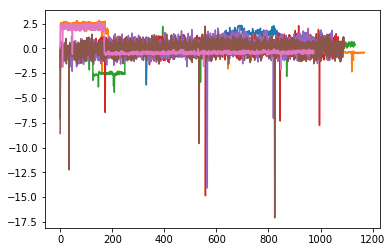

In [291]:
# plots of outliers data
pd.Series(idle_wheel_outlier_1_.flatten()).plot()
pd.Series(idle_wheel_outlier_2_.flatten()).plot()
pd.Series(idle_wheel_outlier_3_.flatten()).plot()
pd.Series(idle_wheel_outlier_4_.flatten()).plot()
pd.Series(idle_wheel_outlier_5_.flatten()).plot()
pd.Series(idle_wheel_outlier_6_.flatten()).plot()
pd.Series(idle_wheel_outlier_7_.flatten()).plot()

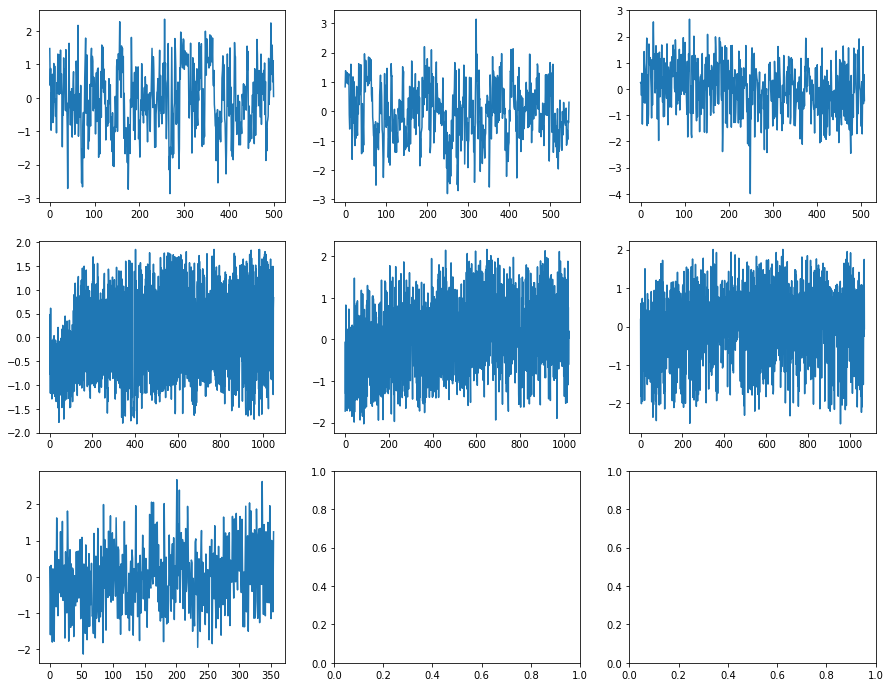

In [293]:
# plots of no outliers data
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,12))
pd.Series(idle_wheel_no_outlier_1_.flatten()).plot(ax=axes[0,0])
pd.Series(idle_wheel_no_outlier_2_.flatten()).plot(ax=axes[0,1])
pd.Series(idle_wheel_no_outlier_3_.flatten()).plot(ax=axes[0,2])
pd.Series(idle_wheel_no_outlier_4_.flatten()).plot(ax=axes[1,0])
pd.Series(idle_wheel_no_outlier_5_.flatten()).plot(ax=axes[1,1])
pd.Series(idle_wheel_no_outlier_6_.flatten()).plot(ax=axes[1,2])
pd.Series(idle_wheel_no_outlier_7_.flatten()).plot(ax=axes[2,0])

In [255]:
# concatenate data of another machine but same sensor
train_data = np.concatenate([idle_wheel_no_outlier_1_,idle_wheel_no_outlier_2_,idle_wheel_no_outlier_3_,
                             idle_wheel_no_outlier_4_, idle_wheel_no_outlier_6_,idle_wheel_no_outlier_7_])
test_data = np.concatenate([idle_wheel_no_outlier_1_])

x_train,y_train = features_and_labels(train_data.flatten(), 10)
x_test,y_test = features_and_labels(test_data.flatten(), 10)

In [256]:
model = Sequential()
model.add(LSTM(100, input_shape=(10,1),bias_initializer='ones'))
model.add(Dense(10, activation='linear',bias_initializer='ones'))
model.add(Dense(1, activation='linear',bias_initializer='ones'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 41,821
Trainable params: 41,821
Non-trainable params: 0
_________________________________________________________________
None


In [260]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
5241/5241 [==============================] - 3s 595us/step - loss: 0.9180
Epoch 2/10
5241/5241 [==============================] - 2s 327us/step - loss: 0.8231
Epoch 3/10
5241/5241 [==============================] - 2s 337us/step - loss: 0.8052
Epoch 4/10
5241/5241 [==============================] - 2s 334us/step - loss: 0.7548
Epoch 5/10
5241/5241 [==============================] - 2s 337us/step - loss: 0.7383
Epoch 6/10
5241/5241 [==============================] - 2s 339us/step - loss: 0.7280
Epoch 7/10
5241/5241 [==============================] - 2s 372us/step - loss: 0.7252
Epoch 8/10
5241/5241 [==============================] - 2s 389us/step - loss: 0.7181
Epoch 9/10
5241/5241 [==============================] - 2s 396us/step - loss: 0.7083
Epoch 10/10
5241/5241 [==============================] - 2s 357us/step - loss: 0.7058


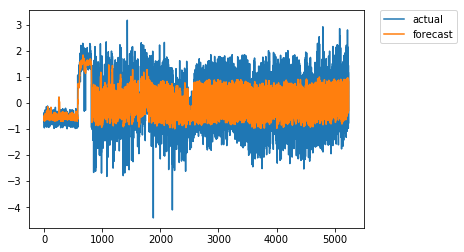

In [261]:
# predict data on training set of no outliers
pred_train = model.predict(x_train)

plt.plot(pd.Series(y_train.flatten()), label="actual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot(pred_train, label="forecast")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [258]:
# pd.Series(abs(pred_train - y_train).flatten()).plot()

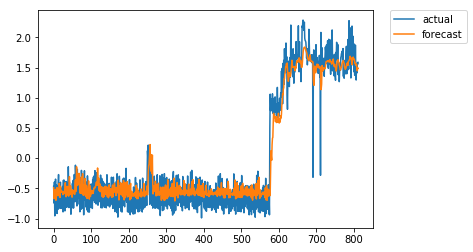

In [262]:
# predict data on test set of no outliers
pred_test = model.predict(x_test)

plt.plot(pd.Series(y_test.flatten()), label="actual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot(pred_test, label="forecast")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [92]:
# pd.Series(abs(pred_test - y_test).flatten()).plot()

In [266]:
# create outliers dataset
# train_data_ = np.concatenate([idle_wheel_outlier_1_,idle_wheel_outlier_2_,idle_wheel_outlier_3_])
test_data_ = np.concatenate([idle_wheel_outlier_1_,idle_wheel_outlier_2_,idle_wheel_outlier_3_,
                            idle_wheel_outlier_4_,idle_wheel_outlier_5_,idle_wheel_outlier_6_,
                            idle_wheel_outlier_7_])

x_train_,y_train_ = features_and_labels(train_data_.flatten(), 10)
x_test_,y_test_ = features_and_labels(test_data_.flatten(), 10)

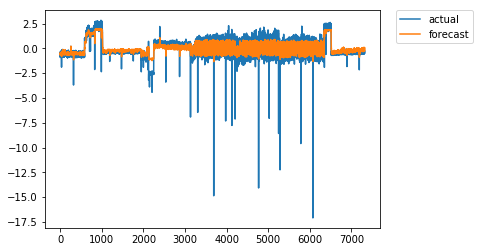

In [267]:
# predict machine (outliers data)
out_test_pred = model.predict(x_test_)

plt.plot(pd.Series(y_test_.flatten()), label="actual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot(out_test_pred, label="forecast")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

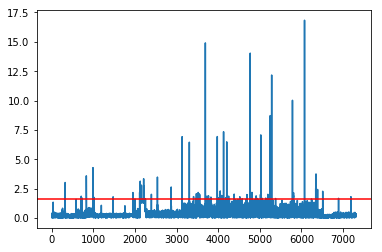

In [324]:
# calculate the absolute difference of predicted value and actual value
# cut off on 3
pd.Series(abs(out_test_pred - y_test_).flatten()).plot()
plt.axhline(y=1.65, color='r')

In [323]:
pd.Series((out_test_pred - y_test_).flatten()).quantile(.99)

1.6533014814903348

In [320]:
pd.Series((out_test_pred - y_test_).flatten()).quantile(.5)

0.030914050696365478

In [270]:
# subset the single data and do prediction
single_data = x_test_[0].reshape(1,10,1)
single_pred = model.predict(single_data)
single_pred

array([[-0.44655228]], dtype=float32)

In [271]:
y_test_[0]

array([-0.70713359])

In [272]:
abs(single_pred - y_test_[0]).flatten()

array([0.26058131])

In [275]:
df_outliers1 = pd.DataFrame(idle_wheel_outlier_1_.flatten())
df_outliers1['machine'] = 'RBG1'

df_outliers2 = pd.DataFrame(idle_wheel_outlier_2_.flatten())
df_outliers2['machine'] = 'RBG2'

df_outliers3 = pd.DataFrame(idle_wheel_outlier_3_.flatten())
df_outliers3['machine'] = 'RBG3'

df_outliers4 = pd.DataFrame(idle_wheel_outlier_4_.flatten())
df_outliers4['machine'] = 'RBG4'

df_outliers5 = pd.DataFrame(idle_wheel_outlier_5_.flatten())
df_outliers5['machine'] = 'RBG5'

df_outliers6 = pd.DataFrame(idle_wheel_outlier_6_.flatten())
df_outliers6['machine'] = 'RBG6'

In [276]:
df_outliers = df_outliers1.append(df_outliers2).append(df_outliers3).append(df_outliers4).append(df_outliers5).append(df_outliers6)

/Users/william/miniconda3/envs/dlenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


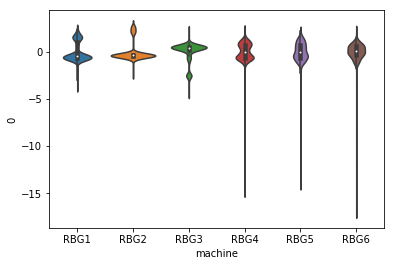

In [277]:
sns.violinplot(x='machine',y=0,data=df_outliers)

In [278]:
df_outliers1 = pd.DataFrame(idle_wheel_no_outlier_1_.flatten())
df_outliers1['machine'] = 'RBG1'

df_outliers2 = pd.DataFrame(idle_wheel_no_outlier_2_.flatten())
df_outliers2['machine'] = 'RBG2'

df_outliers3 = pd.DataFrame(idle_wheel_no_outlier_3_.flatten())
df_outliers3['machine'] = 'RBG3'

df_outliers4 = pd.DataFrame(idle_wheel_no_outlier_4_.flatten())
df_outliers4['machine'] = 'RBG4'

df_outliers5 = pd.DataFrame(idle_wheel_no_outlier_5_.flatten())
df_outliers5['machine'] = 'RBG5'

df_outliers6 = pd.DataFrame(idle_wheel_no_outlier_6_.flatten())
df_outliers6['machine'] = 'RBG6'

In [279]:
df_outliers = df_outliers1.append(df_outliers2).append(df_outliers3).append(df_outliers4).append(df_outliers5).append(df_outliers6)

/Users/william/miniconda3/envs/dlenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


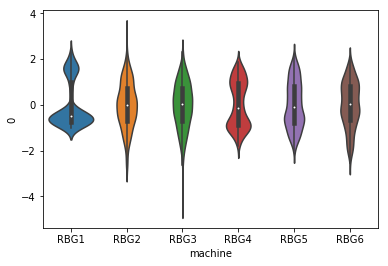

In [280]:
sns.violinplot(x='machine',y=0,data=df_outliers)